## Kidney Disease Prediction

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
from sklearn.preprocessing import StandardScaler

In [4]:
import warnings
warnings.filterwarnings('ignore')

## Importing the DataSet

In [5]:
dataset = pd.read_csv("C://Users//maitrik//Desktop//HealthCare//DataSet/kidney_disease.csv")

In [6]:
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [7]:
dataset.drop('id', axis = 1, inplace = True)
dataset.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [9]:
# converting necessary columns to numerical type 
dataset['packed_cell_volume'] = pd.to_numeric(dataset['packed_cell_volume'], errors='coerce')
dataset['white_blood_cell_count'] = pd.to_numeric(dataset['white_blood_cell_count'], errors='coerce')
dataset['red_blood_cell_count'] = pd.to_numeric(dataset['red_blood_cell_count'], errors='coerce')

In [10]:
dataset['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

dataset['coronary_artery_disease'] = dataset['coronary_artery_disease'].replace(to_replace = '\tno', value='no')

dataset['class'] = dataset['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

In [11]:
dataset['class'] = dataset['class'].map({'ckd': 0, 'not ckd': 1})
dataset['class'] = pd.to_numeric(dataset['class'], errors='coerce')

In [12]:
cols = ['diabetes_mellitus', 'coronary_artery_disease', 'class']

for col in cols:
    print(f"{col} has {dataset[col].unique()} values\n")

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

class has [0 1] values



In [13]:
cat_cols = [col for col in dataset.columns if dataset[col].dtype == 'object']
num_cols = [col for col in dataset.columns if dataset[col].dtype != 'object']

In [14]:
# looking at unique values in categorical columns

for col in cat_cols:
    print(f"{col} has {dataset[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' nan] values

coronary_artery_disease has ['no' 'yes' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



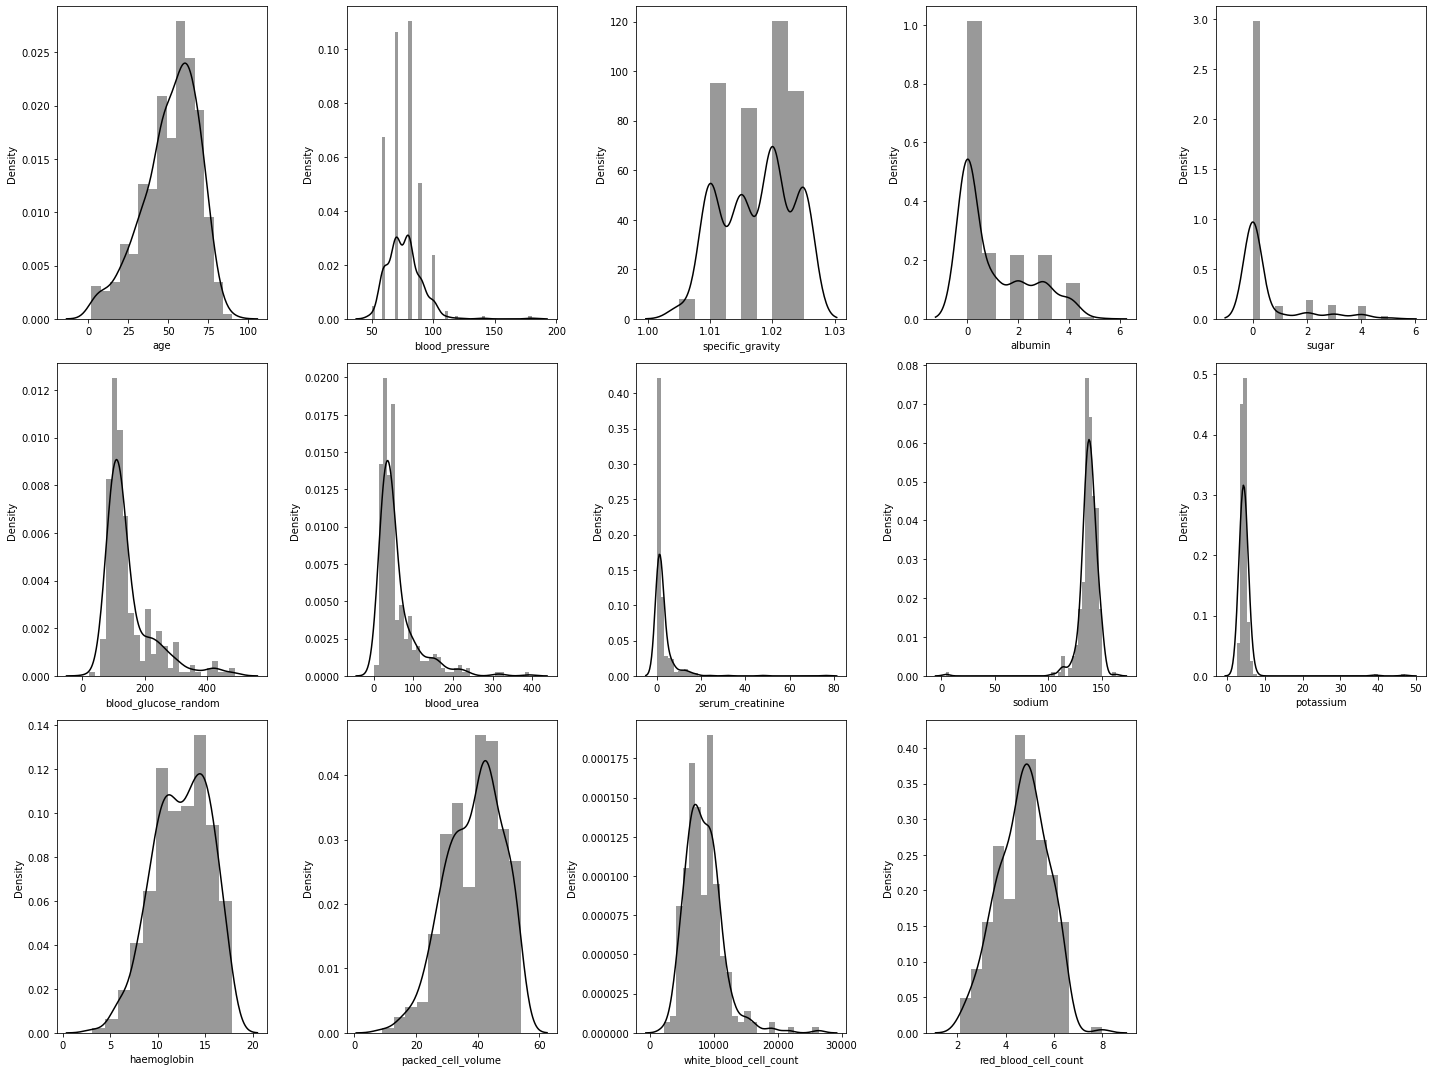

In [15]:
# checking numerical features distribution
plt.figure(figsize = (20, 15))
plotnumber = 1
for column in num_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(dataset[column],color='black',)
        plt.xlabel(column)
    
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<AxesSubplot:>

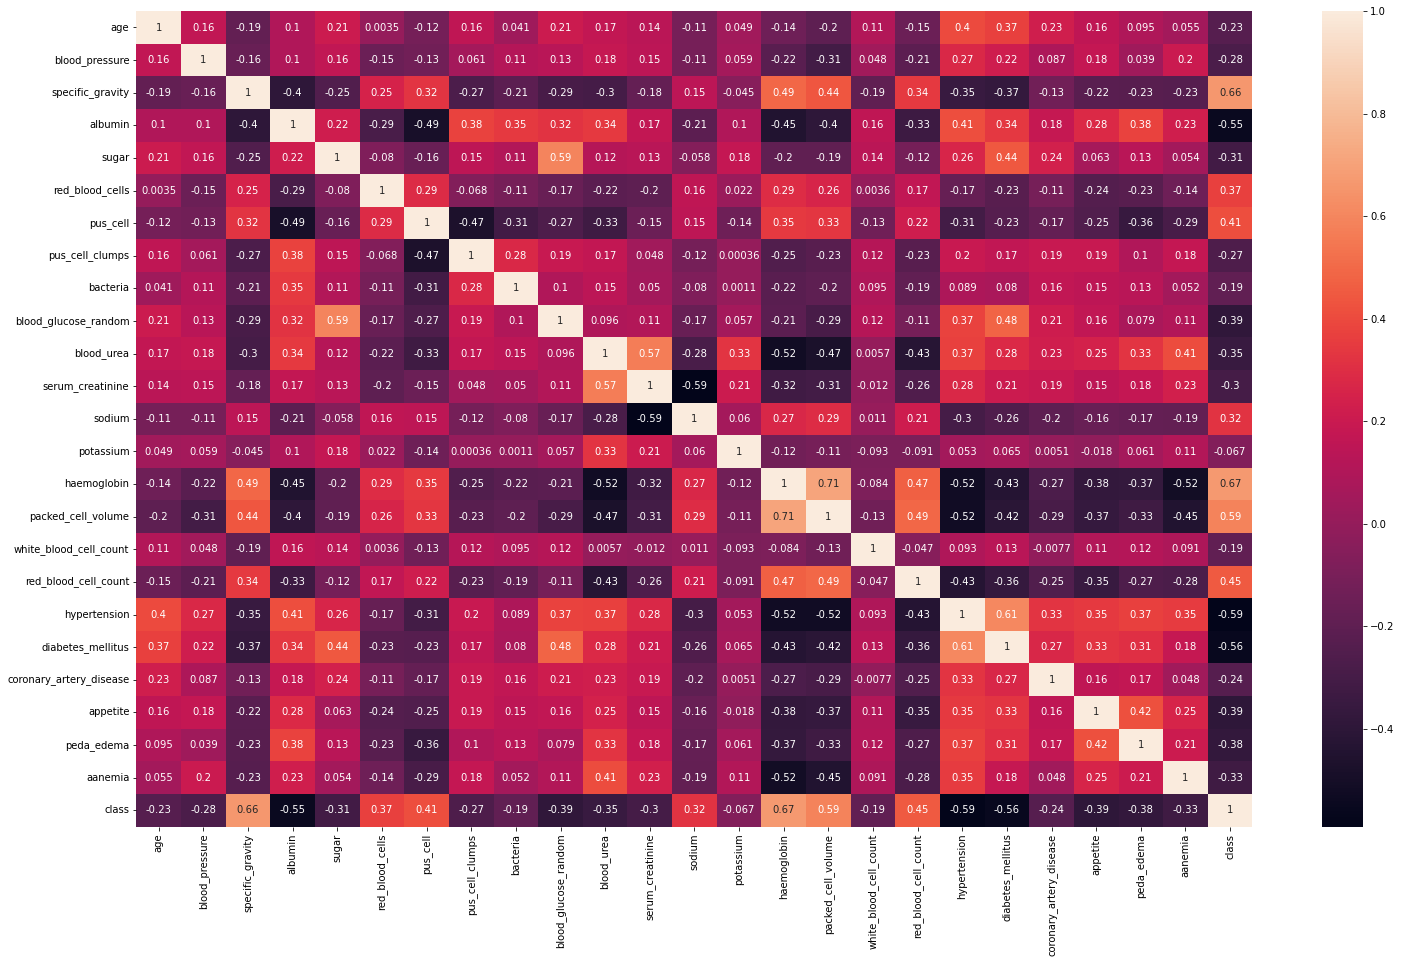

In [50]:
plt.figure(figsize = (25,15))
sns.heatmap(dataset.corr(),annot= True)

In [17]:
# checking for null values and correct it

dataset.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [18]:
dataset[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
class                       0
dtype: int64

In [19]:
dataset[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [20]:
def random_value_imputation(feature):
    random_sample = dataset[feature].dropna().sample(dataset[feature].isna().sum())
    random_sample.index = dataset[dataset[feature].isnull()].index
    dataset.loc[dataset[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = dataset[feature].mode()[0]
    dataset[feature] = dataset[feature].fillna(mode)

In [21]:
for col in num_cols:
    random_value_imputation(col)
dataset[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [22]:
random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')

for col in cat_cols:
    impute_mode(col)
dataset[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    dataset[col] = le.fit_transform(dataset[col])

In [24]:
dataset.head()

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,0,1,0,0,97.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,4.5,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,0


In [25]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

## Model Training and Testing (Random Forest Classifier)

In [27]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [28]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [29]:
cm1 = confusion_matrix(y_test, y_pred)

In [30]:
cm1

array([[52,  0],
       [ 2, 26]], dtype=int64)

In [31]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        52
           1       1.00      0.93      0.96        28

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



In [32]:
maxValues = dataset.max()
 
print(maxValues)

age                           90.000
blood_pressure               180.000
specific_gravity               1.025
albumin                        5.000
sugar                          5.000
red_blood_cells                1.000
pus_cell                       1.000
pus_cell_clumps                1.000
bacteria                       1.000
blood_glucose_random         490.000
blood_urea                   391.000
serum_creatinine              76.000
sodium                       163.000
potassium                     47.000
haemoglobin                   17.800
packed_cell_volume            54.000
white_blood_cell_count     26400.000
red_blood_cell_count           8.000
hypertension                   1.000
diabetes_mellitus              1.000
coronary_artery_disease        1.000
appetite                       1.000
peda_edema                     1.000
aanemia                        1.000
class                          1.000
dtype: float64


In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific_gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red_blood_cells          400 non-null    int32  
 6   pus_cell                 400 non-null    int32  
 7   pus_cell_clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood_glucose_random     400 non-null    float64
 10  blood_urea               400 non-null    float64
 11  serum_creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  haemoglobin              4

In [34]:
import pickle
pickle.dump(classifier, open("kidney.pkl",'wb'))

In [39]:
dataset[num_cols].max()

age                          90.000
blood_pressure              180.000
specific_gravity              1.025
albumin                       5.000
sugar                         5.000
blood_glucose_random        490.000
blood_urea                  391.000
serum_creatinine             76.000
sodium                      163.000
potassium                    47.000
haemoglobin                  17.800
packed_cell_volume           54.000
white_blood_cell_count    26400.000
red_blood_cell_count          8.000
class                         1.000
dtype: float64

In [40]:
dataset[cat_cols].min()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int32

In [48]:
result = X_train.to_json(orient="index")

In [49]:
print(result)

{"3":{"age":48.0,"blood_pressure":70.0,"specific_gravity":1.005,"albumin":4.0,"sugar":0.0,"red_blood_cells":1,"pus_cell":0,"pus_cell_clumps":1,"bacteria":0,"blood_glucose_random":117.0,"blood_urea":56.0,"serum_creatinine":3.8,"sodium":111.0,"potassium":2.5,"haemoglobin":11.2,"packed_cell_volume":32.0,"white_blood_cell_count":6700.0,"red_blood_cell_count":3.9,"hypertension":1,"diabetes_mellitus":0,"coronary_artery_disease":0,"appetite":1,"peda_edema":1,"aanemia":1},"18":{"age":60.0,"blood_pressure":100.0,"specific_gravity":1.025,"albumin":0.0,"sugar":3.0,"red_blood_cells":1,"pus_cell":1,"pus_cell_clumps":0,"bacteria":0,"blood_glucose_random":263.0,"blood_urea":27.0,"serum_creatinine":1.3,"sodium":135.0,"potassium":4.3,"haemoglobin":12.7,"packed_cell_volume":37.0,"white_blood_cell_count":11400.0,"red_blood_cell_count":4.3,"hypertension":1,"diabetes_mellitus":1,"coronary_artery_disease":1,"appetite":0,"peda_edema":0,"aanemia":0},"202":{"age":78.0,"blood_pressure":60.0,"specific_gravity":1